In [287]:
# import the needed libraries
import pandas as pd
import matplotlib.pyplot as plt

In [288]:
# utility function
def load_data():
    """Load the cleaned data"""
    # get your data; read with pandas and store in a variable
    df= "datasets/global_food_prices.csv"
    prices_table=pd.read_csv(df)
    
    # remove unwanted columns
    prices_table.drop('mp_commoditysource', axis=1, inplace=True)
    prices_table.drop('cur_id', axis=1, inplace=True)
    
    # rename the columns
    prices_table.rename(columns={
        prices_table.columns[0]:'Country ID',
        prices_table.columns[1]:'Country Name',
        prices_table.columns[2]:'Locality ID',
        prices_table.columns[3]:'Locality Name',
        prices_table.columns[4]:'Market ID',
        prices_table.columns[5]:'Market Name',
        prices_table.columns[6]:'Commodity Purchased ID',
        prices_table.columns[7]:'Commodity Purchased',
        prices_table.columns[8]:'Name Of Currency',
        prices_table.columns[9]:'Market Type ID',
        prices_table.columns[10]:'Market Type',
        prices_table.columns[11]:'Measurement ID',
        prices_table.columns[12]:'Unit Of Goods Measurement',
        prices_table.columns[13]:'Month',
        prices_table.columns[14]:'Year',
        prices_table.columns[15]:'Price Paid'
                                },inplace=True)
    
    # split commodity column to retain only the commodity name
    goods=[]
    for good in prices_table['Commodity Purchased'].str.split(' - '):
        goods.append(good[0])
    # overwrite the commodity column
    prices_table['Commodity Purchased']=goods
    
    # define each month number in a dictionary with its month number as key
    month_name={
        1:'January',
        2:'February',
        3:'March',
        4:'April',
        5:'May',
        6:'June',
        7:'July',
        8:'August',
        9:'September',
        10:'October',
        11:'November',
        12:'December'
    }
    
    # change the month number to its month name
    prices_table.Month=prices_table.Month.map(month_name)
    
    return prices_table


In [289]:
# call the load_data function and save in a variable
prices_table=load_data()

C:\Users\GBOLA\AppData\Local\Temp\ipykernel_1040\630769365.py:6: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  prices_table=pd.read_csv(df)


In [290]:
# utility variables
 # store the minimum and maximum years in a variable
min_year=prices_table['Year'][prices_table['Year'].idxmin()]
max_year=prices_table['Year'][prices_table['Year'].idxmax()]

# group the data by country and year column
countrygrp=prices_table.groupby('Country Name')
yeargrp=prices_table.groupby('Year')

# evaluate the total purchases made in all years
total_food_purchases=prices_table['Commodity Purchased'].count()

# evaluate the number of different countries involved, 
number_of_countries=len(prices_table['Country Name'].unique())
number_of_commodities=len(prices_table['Commodity Purchased'].unique())
number_of_years=len(prices_table['Year'].unique())

In [291]:
# dataframe of overall information
table1= {'Total Food Purchases':total_food_purchases,
           'Number of Commodities':number_of_commodities,
           'Number of Countries':number_of_countries,
           'Number of Years':number_of_years}
pd.DataFrame(overview, index=[1])

,Total Food Purchases,Number of Commodities,Number of Countries,Number of Years
1,2050638,636,98,32


In [292]:
# table of top localities of purchases
table2=pd.DataFrame(prices_table[['Locality ID','Locality Name','Country Name']].groupby('Locality ID').value_counts().sort_values(ascending=False)).head(6)
table2.rename({table2.columns[0]:'Number of Purchases'},axis=1)

,,,Number of Purchases
Locality ID,Locality Name,Country Name,
21971,North/Amajyaruguru,Rwanda,34770
21972,South/Amajyepfo,Rwanda,31610
21969,East/Iburasirazuba,Rwanda,30805
21973,West/Iburengerazuba,Rwanda,30032
2240,Yobe,Nigeria,15671
2216,Borno,Nigeria,14512


In [293]:
# table of top markets of purchases
table3=pd.DataFrame(prices_table[['Market ID','Market Name','Country Name']].groupby('Market ID').value_counts().sort_values(ascending=False)).head(6)
table3.rename({table3.columns[0]:'Number of Purchases'},axis=1)

,,,Number of Purchases
Market ID,Market Name,Country Name,
840,Bogota,Colombia,5798
302,Dushanbe,Tajikistan,5270
305,Khujand,Tajikistan,5270
303,Gharm,Tajikistan,5241
306,Bokhtar,Tajikistan,5224
304,Khorog,Tajikistan,4596


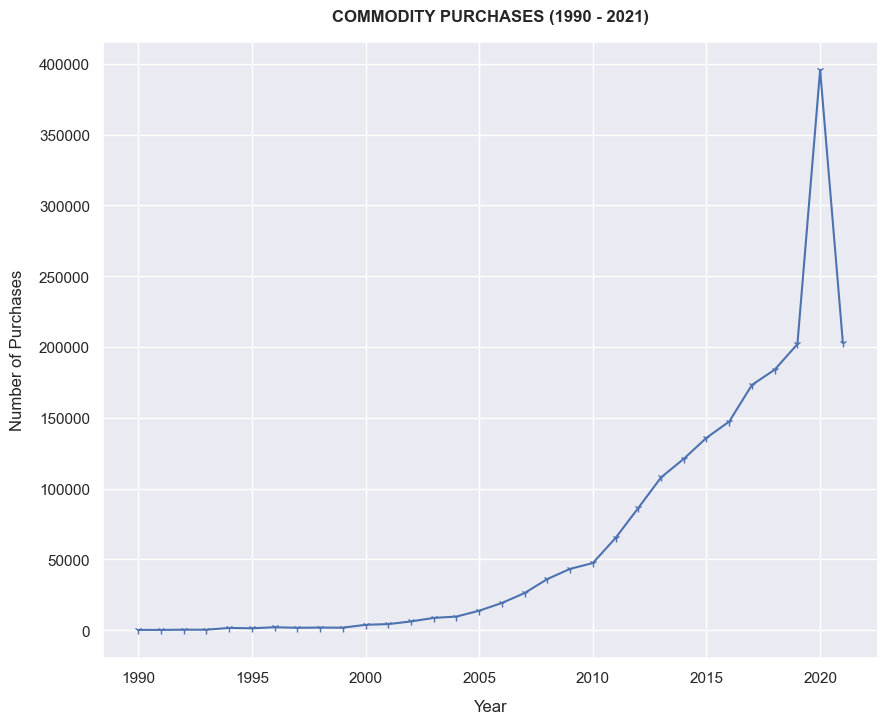

In [294]:
# total commodities purchased from 1990-2021
fig1,ax1=plt.subplots(figsize=(10,8))
line_data=prices_table.groupby('Year')['Commodity Purchased'].count()
ax1.plot(line_data.index, line_data.values,marker='1')
ax1.set_xlabel('Year',labelpad=10)
ax1.set_ylabel('Number of Purchases', labelpad=10)
ax1.set_title(f'COMMODITY PURCHASES ({min_year} - {max_year})',pad=15,fontweight='bold')
plt.show()

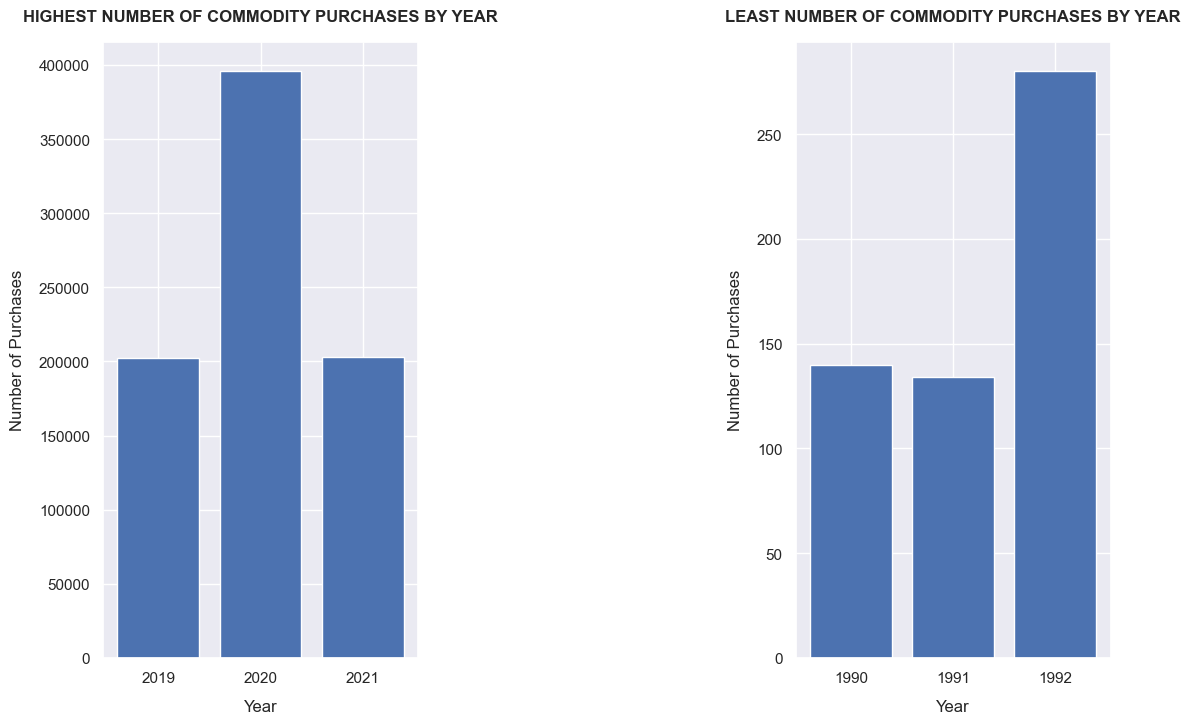

In [295]:
# bar charts of the top 3 highest and lowest commodity purchases years
bar_data1=line_data.sort_values(ascending=False).head(3)
fig2,ax1=plt.subplots(1,2,figsize=(13,8))
ax1[0].bar(x=bar_data1.index,height=bar_data1.values)
ax1[0].set_ylabel('Number of Purchases',labelpad=10)
ax1[0].set_xlabel('Year',labelpad=10)
ax1[0].set_title('HIGHEST NUMBER OF COMMODITY PURCHASES BY YEAR',pad=15,fontweight='bold',wrap=True)

bar_data2=line_data.sort_values(ascending=True).head(3)
ax1[1].bar(x=bar_data2.index,height=bar_data2.values)
ax1[1].set_ylabel('Number of Purchases',labelpad=10)
ax1[1].set_xlabel('Year',labelpad=10)
ax1[1].set_title('LEAST NUMBER OF COMMODITY PURCHASES BY YEAR',pad=15,fontweight='bold')
plt.subplots_adjust(wspace=1.2)
plt.show()

C:\Users\GBOLA\AppData\Local\Temp\ipykernel_1040\138555310.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1[0].set_xticklabels([str(tick)[:12] for tick in country_purchases.sort_values().head(10).index],rotation=90)
C:\Users\GBOLA\AppData\Local\Temp\ipykernel_1040\138555310.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1[1].set_xticklabels([str(tick)[:12] for tick in country_purchases.sort_values(ascending=False).head(10).index],rotation=90)


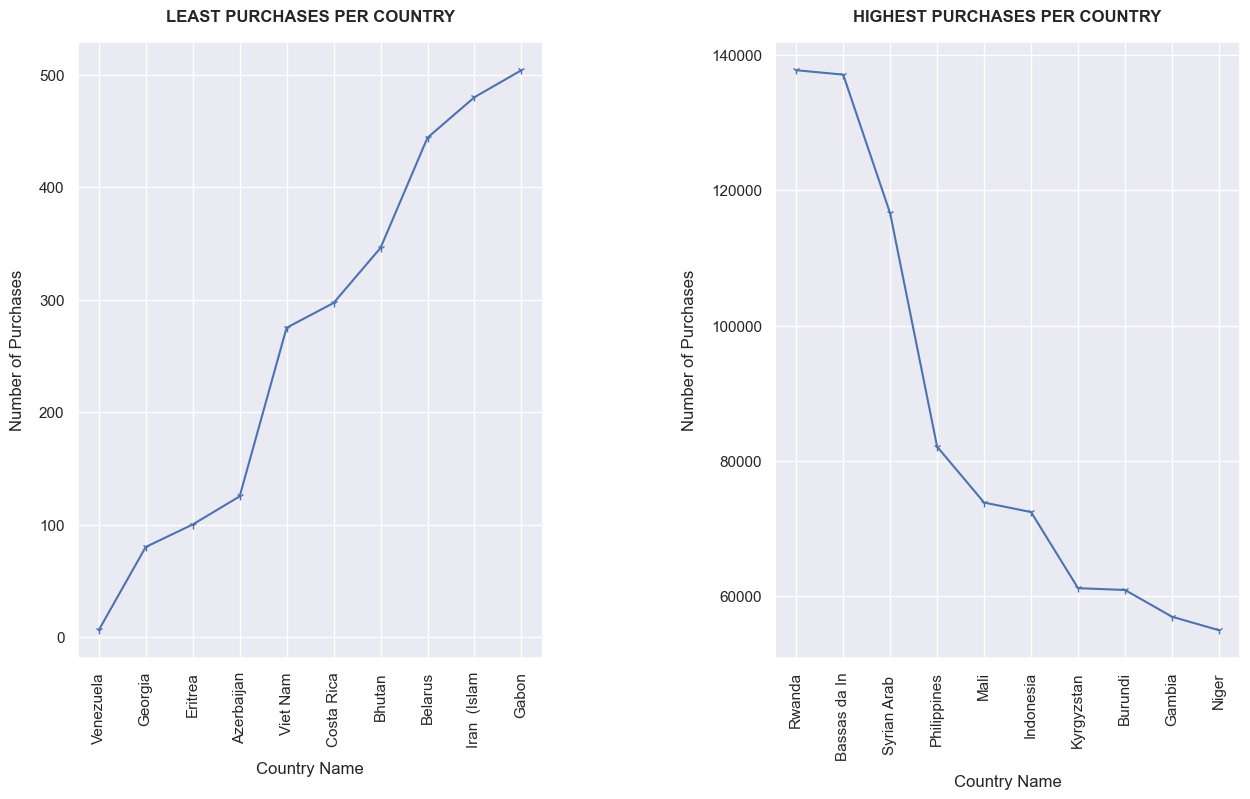

In [296]:
# line graphs of the top 10 highest and lowest purchases countries
country_purchases=prices_table.groupby('Country Name')['Commodity Purchased'].count()
fig5,ax1=plt.subplots(1,2,figsize=(15,8))
ax1[0].plot(country_purchases.sort_values().head(10),marker='1')
ax1[0].set_xticklabels([str(tick)[:12] for tick in country_purchases.sort_values().head(10).index],rotation=90)
ax1[0].set_xlabel('Country Name',labelpad=10)
ax1[0].set_ylabel('Number of Purchases',labelpad=10)
ax1[0].set_title('LEAST PURCHASES PER COUNTRY',pad=15,fontweight='bold')

ax1[1].plot(country_purchases.sort_values(ascending=False).head(10),marker='1')
ax1[1].set_xticklabels([str(tick)[:12] for tick in country_purchases.sort_values(ascending=False).head(10).index],rotation=90)
ax1[1].set_xlabel('Country Name',labelpad=10)
ax1[1].set_ylabel('Number of Purchases',labelpad=10)
ax1[1].set_title('HIGHEST PURCHASES PER COUNTRY',pad=15,fontweight='bold')

plt.subplots_adjust(wspace=0.5)
plt.show()

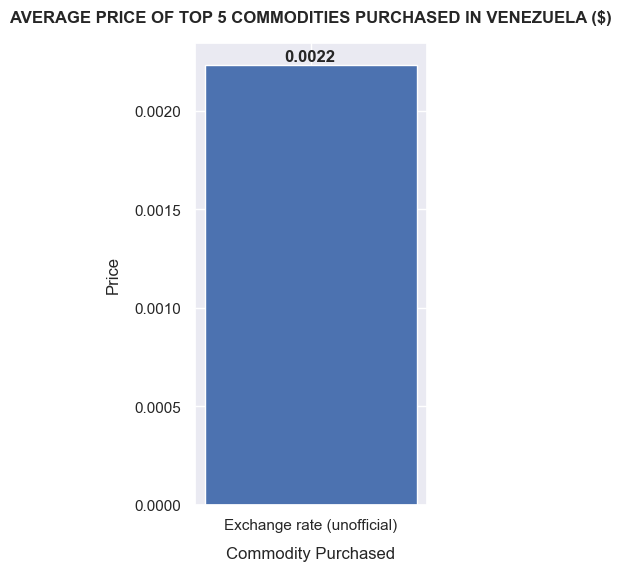

In [297]:
# bar chart of the average price of commodities in venezuela(lowest commodities purchases country). all prices in US dollars
fig3,ax1=plt.subplots(figsize=(3,6))
# divide the column by the exchange rate
bar_data3=prices_table.groupby('Country Name').get_group('Venezuela').groupby('Commodity Purchased').mean()['Price Paid'].sort_values(ascending=False).head(5)/2448580.10
ax1.bar(x=bar_data3.index,height=bar_data3.values)
ax1.set_xlabel('Commodity Purchased',labelpad=10)
ax1.set_ylabel('Price',labelpad=10)
ax1.set_title('AVERAGE PRICE OF TOP 5 COMMODITIES PURCHASED IN VENEZUELA ($)',pad=15,fontweight='bold')
# add column height value
for i,v in enumerate(bar_data3.values):
    ax1.text(i-.1,v+.00002,str(round(v,4)),fontweight='bold')


plt.show()

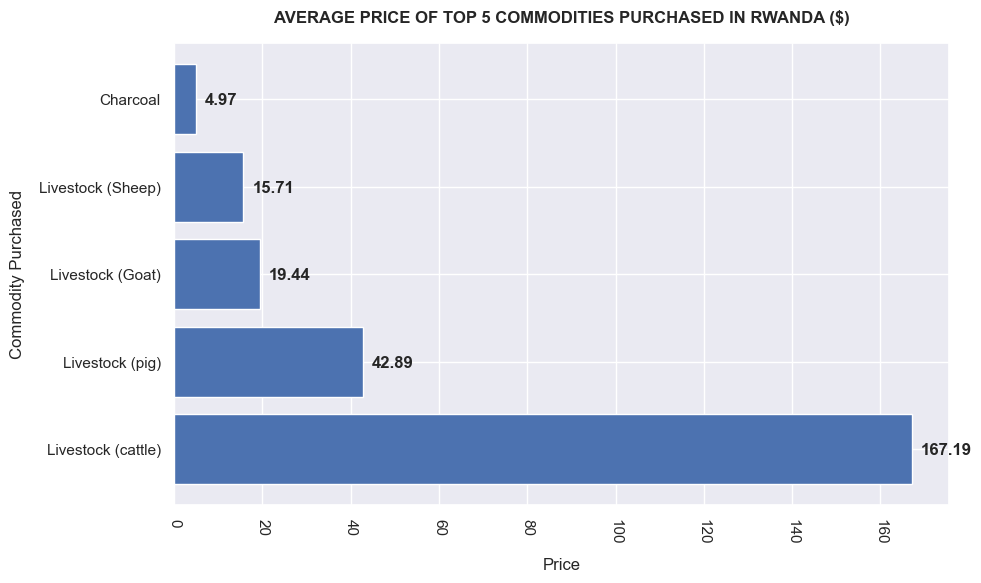

In [298]:
# bar chart of the average price of commodities in Rwanda(highest purchases country). all prices in US dollars
fig4,ax1=plt.subplots(figsize=(10,6))
# divide the value by the exchange rate
bar_data4=prices_table.groupby('Country Name').get_group('Rwanda').groupby('Commodity Purchased').mean()['Price Paid'].sort_values(ascending=False).head(5)/1101.99
ax1.barh(y=bar_data4.index,width=bar_data4.values)
ax1.set_ylabel('Commodity Purchased',labelpad=10)
ax1.set_xlabel('Price', labelpad=10)
ax1.set_title('AVERAGE PRICE OF TOP 5 COMMODITIES PURCHASED IN RWANDA ($)',pad=15,fontweight='bold')
# add column height value
for i,v in enumerate(bar_data4.values):
    ax1.text(v+2,i-.06,str(round(v,2)),fontweight='bold')

plt.xticks(rotation=270)

plt.show()

In [299]:
# table of number of purchases from each market type
pd.DataFrame(prices_table['Market Type'].value_counts())

,Market Type
Retail,1878421
Wholesale,171305
Farm Gate,664
Producer,248


In [300]:
# table of market types per year
retail_type=prices_table.groupby('Market Type').get_group('Retail')[['Year']].groupby('Year').value_counts()
df_retail=pd.DataFrame(retail_type)

wholesale_type=prices_table.groupby('Market Type').get_group('Wholesale')[['Year']].groupby('Year').value_counts()
df_retail['Wholesale']=pd.DataFrame(wholesale_type)

producer_type=prices_table.groupby('Market Type').get_group('Producer')[['Year']].groupby('Year').value_counts()
df_retail['Producer']=pd.DataFrame(producer_type)

farmgate_type=prices_table.groupby('Market Type').get_group('Farm Gate')[['Year']].groupby('Year').value_counts()
df_retail['Farm Gate']=pd.DataFrame(farmgate_type)

df_retail.rename({df_retail.columns[0]:'Retail'},axis=1,inplace=True)

df_retail.head(10).fillna(0)

,Retail,Wholesale,Producer,Farm Gate
Year,,,,
1990,140,0.0,0.0,0.0
1991,134,0.0,0.0,0.0
1992,280,0.0,0.0,0.0
1993,284,0.0,0.0,0.0
1994,1537,0.0,0.0,0.0
1995,1287,0.0,0.0,0.0
1996,2022,0.0,0.0,0.0
1997,1638,0.0,0.0,0.0
1998,1773,19.0,0.0,0.0


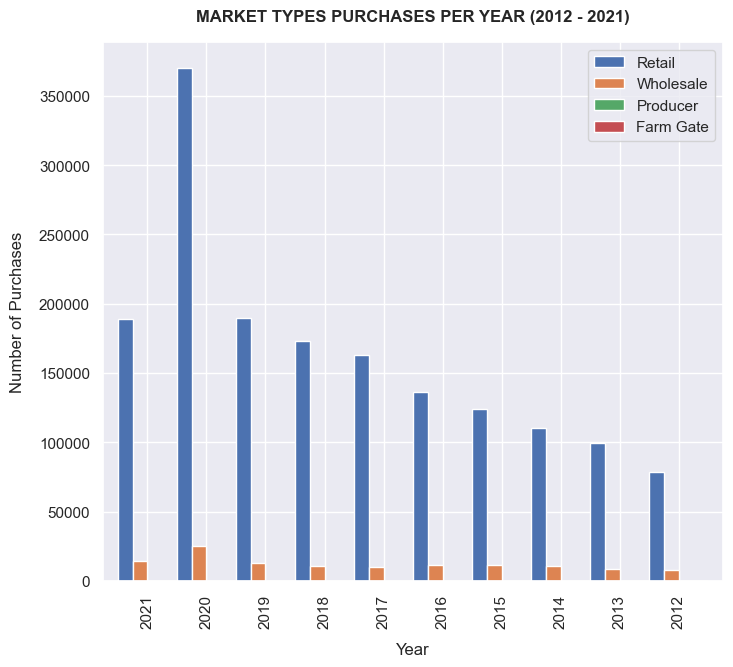

In [301]:
# bar chart of top 10 purchases for each market type
df_retail.sort_index(ascending=False).head(10).plot(kind='bar',width=1,figsize=(8,7))

plt.title('MARKET TYPES PURCHASES PER YEAR (2012 - 2021)',pad=15,fontweight='bold')
plt.xlabel('Year',labelpad=10)
plt.ylabel('Number of Purchases',labelpad=10)
plt.show()

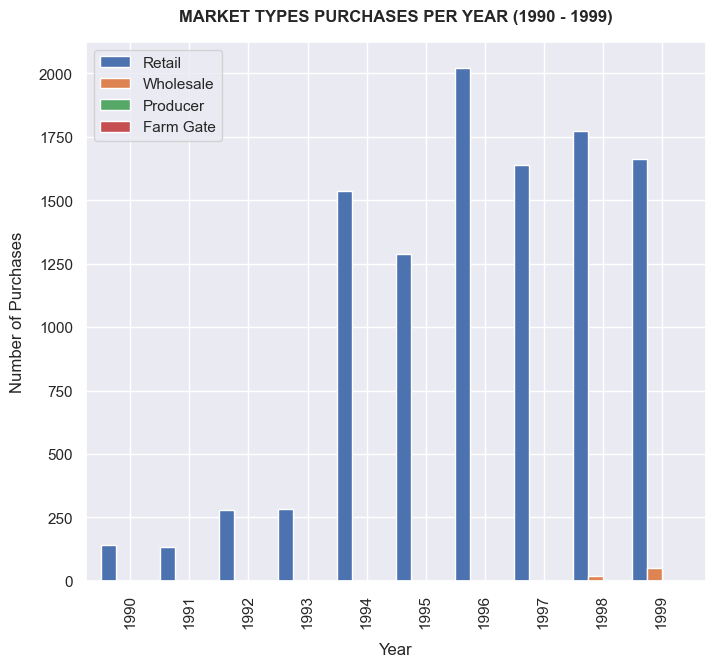

In [302]:
# bar chart of top 10 purchases for each market type
df_retail.head(10).plot(kind='bar',width=1,figsize=(8,7))
plt.title('MARKET TYPES PURCHASES PER YEAR (1990 - 1999)',pad=15,fontweight='bold')
plt.xlabel('Year',labelpad=10)
plt.ylabel('Number of Purchases',labelpad=10)
plt.show()

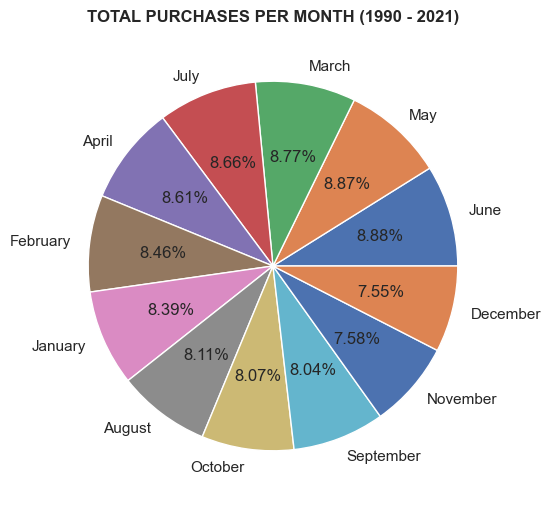

In [303]:
# pie chart of number of purchases per month
pie_data1=prices_table['Month'].value_counts()
fig1, ax1 = plt.subplots(figsize=(6,6))
ax1.pie(pie_data1, labels=pie_data1.index, autopct='%1.2f%%')

plt.title(f'TOTAL PURCHASES PER MONTH ({min_year} - {max_year})',pad=10,fontweight='bold')
plt.show()

# HOW I DEVELOPED MY PYTHON PROJECT IN JUPYTER NOTEBOOK

## STEPS

1. Firstly, I imported the needed libraries into the app. These libraries include: matplotlib.pyplot and pandas.

2. Next, I used pandas to read the dataset then I performed data cleaning operation on the dataset. This process involved changing the column names to an easily comprehensible form, removal of unwanted columns and modification of columns values. All these were structured in a "load_data()" function which I created.

3. I proceeded to call on the "load_data()" function using pandas, which I stored in a "prices_table" variable.

4. I then extracted general information from the dataset for important analysis. I used the data to create a dataframe using pandas' ".DataFrame()" function. These included the total purchases, total unique commodities, total countries, total years span

5. I also created a dataframe of top 6 localities and market places where purchases were made with the country name and number of purchases. I used ".sort_values()" function in order to achieve this task

6. The next chart I made was a line chart. It displayed the total commodities purchased in each year. I added a marker for visibility and the labels for the axes

7. Followed, I made use of matplotlib's axessubplot to draw two charts in a figure. The charts gave an insight into the top and bottom 3 purchases years. I added padding around the titles and axes labels as needed then spaced them as appropriate.

8. I went on the graph the top and bottom 10 countries where purchases were made. Here, I reduced the length x-axis label using ".set_xticklabels()" to a limit of 12 characters. Likewise, I added a marker for visibility.

9. Next I drew 2 bar charts of the top 5 commodities purchased in the country with the least and highest purchases i.e Venezuela and Rwanda respectively. I grouped the data by the country name column then used ".get_group()" function to extract data on the countries involved. I converted my values to US dollars by using the exchange rates from google sites : "www.xe.com" and "www.google.com/finance". For the chart, I added the column height using ".text()" and "enumerate()" by iterating through a list of tuples of the index and value of each column height. I used this as coordinates to position my text.

10. I then created a dataframe of the number of purchases from each market type.

11. I used data from step 10 to get the different market types then created a dataframe with the different market types as column names and the number of purchases for each per year. Lastely, I filled up null values with 0.

12. I used dataframe from step 11 to create a bar chart of purchases from each market type per year. This was divided into 2 charts: the first 10 and last 10 years of the entire span. This was because purchases were very small for the first few years and much greater towards the last set of years. The market types were the legend.

13. The last chart was of purchases per month throughout the years. This was done as a pie chart. I also set the values to 2 decimal places with "autopct='%1.2f%%'" keyword argument.